In [1]:
cd ../..

C:\Users\mrefoyo\Documents\Proyectos\Sub-SpaCE_plus


In [2]:
import os
import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf

from experiments.evaluation.evaluation_utils import load_dataset_for_eval, calculate_metrics_for_dataset

print(tf.__version__)

2.13.0


In [3]:
# datasets = ['CBF', 'chinatown', 'coffee', 'gunpoint', 'ECG200']
DATASETS = ["NATOPS", "BasicMotions", 'UWaveGestureLibrary']
methods = ['subspace_individual', 'subspace_grouped', 'subspace_v2_individual', 'subspace_v2_grouped']
counterfactual_methods = [f"{method}.pickle" for method in methods]

# Get results

In [4]:
# Data and aux data dict
data_dict = {}
models_dict = {}
outlier_calculators_dict = {}
nuns_idx_dict = {}
desired_classes_dict = {}
original_classes_dict = {}

# Results dicts
mean_results_dict = {}
methods_cfs_dict = {}
results_all_datasets_df = pd.DataFrame()

# Iterate through datasets
for dataset in DATASETS:
    print(f'Calculating metrics for {dataset}')
    # Load all info needed to get the counterfactual
    data_tuple, original_classes, model, outlier_calculator, nuns_idx, desired_classes = load_dataset_for_eval(dataset)
    data_dict[dataset] = data_tuple
    models_dict[dataset] = model
    outlier_calculators_dict[dataset] = outlier_calculator
    nuns_idx_dict[dataset] = nuns_idx
    desired_classes_dict[dataset] = desired_classes
    original_classes_dict[dataset] = original_classes

    # Get the metrics for all methods
    dataset_mean_std_df, dataset_results_df, method_cfs_dataset = calculate_metrics_for_dataset(
        dataset, counterfactual_methods,
        data_tuple, original_classes, model, outlier_calculator, nuns_idx
    )
    mean_results_dict[dataset] = dataset_mean_std_df
    methods_cfs_dict[dataset] = method_cfs_dataset
    results_all_datasets_df = pd.concat([results_all_datasets_df, dataset_results_df])

    # Store results
    dataset_mean_std_df.to_csv(f'./experiments/evaluation/results_mean_metrics_{dataset}.csv', sep=";", index=False)

# Store all results
results_all_datasets_df.to_csv(f'./experiments/evaluation/results_all.csv', sep=";", index=False)


Calculating metrics for NATOPS
subspace_grouped.pickle


100%|██████████| 180/180 [00:08<00:00, 20.83it/s]


subspace_individual.pickle


100%|██████████| 180/180 [00:08<00:00, 20.68it/s]


subspace_v2_grouped.pickle


100%|██████████| 180/180 [00:08<00:00, 20.72it/s]


subspace_v2_individual.pickle


100%|██████████| 180/180 [00:08<00:00, 20.42it/s]


Calculating metrics for BasicMotions
subspace_grouped.pickle


100%|██████████| 40/40 [00:01<00:00, 20.64it/s]


subspace_individual.pickle


100%|██████████| 40/40 [00:01<00:00, 21.16it/s]


subspace_v2_grouped.pickle


100%|██████████| 40/40 [00:01<00:00, 20.98it/s]


subspace_v2_individual.pickle


100%|██████████| 40/40 [00:01<00:00, 20.98it/s]


Calculating metrics for UWaveGestureLibrary
subspace_grouped.pickle


100%|██████████| 320/320 [00:15<00:00, 21.04it/s]


subspace_individual.pickle


100%|██████████| 320/320 [00:15<00:00, 20.99it/s]


subspace_v2_grouped.pickle


100%|██████████| 320/320 [00:14<00:00, 21.46it/s]


subspace_v2_individual.pickle


100%|██████████| 320/320 [00:14<00:00, 21.35it/s]


In [5]:
from IPython.display import display
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset])

NATOPS


,method,nchanges,sparsity,L1,L2,proba,valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_grouped,349.33 ± 167.63,0.29 ± 0.14,172.95 ± 140.81,10.93 ± 7.01,0.9 ± 0.11,1.0 ± 0.0,0.56 ± 0.16,0.06 ± 0.06,24.8 ± 5.62,0.04 ± 0.01,36.97 ± 9.78
1,subspace_individual,472.45 ± 164.66,0.39 ± 0.13,186.85 ± 135.41,11.17 ± 6.45,0.96 ± 0.05,1.0 ± 0.0,0.65 ± 0.21,0.14 ± 0.11,101.86 ± 25.81,0.17 ± 0.04,37.88 ± 9.11
2,subspace_v2_grouped,351.47 ± 165.9,0.29 ± 0.14,174.18 ± 140.58,11.0 ± 7.0,0.9 ± 0.1,1.0 ± 0.0,0.56 ± 0.16,0.06 ± 0.06,24.67 ± 4.7,0.04 ± 0.01,62.11 ± 10.28
3,subspace_v2_individual,422.65 ± 173.94,0.35 ± 0.14,185.05 ± 141.15,11.22 ± 6.72,0.96 ± 0.03,1.0 ± 0.0,0.61 ± 0.19,0.11 ± 0.09,60.57 ± 17.55,0.1 ± 0.03,71.77 ± 13.73


BasicMotions


,method,nchanges,sparsity,L1,L2,proba,valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_grouped,276.35 ± 118.55,0.46 ± 0.2,931.26 ± 797.2,75.14 ± 53.82,0.78 ± 0.08,1.0 ± 0.0,0.24 ± 0.14,0.0 ± 0.01,16.2 ± 6.26,0.05 ± 0.02,27.87 ± 6.1
1,subspace_individual,290.5 ± 131.45,0.48 ± 0.22,982.14 ± 861.87,77.28 ± 55.11,0.82 ± 0.09,1.0 ± 0.0,0.27 ± 0.15,0.02 ± 0.03,34.55 ± 8.4,0.12 ± 0.03,28.6 ± 5.98
2,subspace_v2_grouped,287.4 ± 116.19,0.48 ± 0.19,935.94 ± 775.22,75.09 ± 53.35,0.77 ± 0.08,1.0 ± 0.0,0.23 ± 0.13,0.0 ± 0.01,11.7 ± 5.91,0.04 ± 0.02,49.31 ± 7.42
3,subspace_v2_individual,308.1 ± 133.35,0.51 ± 0.22,1048.16 ± 907.97,79.47 ± 56.61,0.85 ± 0.06,1.0 ± 0.0,0.24 ± 0.13,0.01 ± 0.01,20.88 ± 9.54,0.07 ± 0.03,52.42 ± 8.36


UWaveGestureLibrary


,method,nchanges,sparsity,L1,L2,proba,valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_grouped,350.38 ± 135.05,0.37 ± 0.14,298.5 ± 128.85,19.09 ± 5.38,0.87 ± 0.09,1.0 ± 0.0,0.66 ± 0.12,0.09 ± 0.07,11.4 ± 4.95,0.02 ± 0.01,56.93 ± 15.88
1,subspace_individual,387.57 ± 147.71,0.41 ± 0.16,325.03 ± 136.48,19.9 ± 5.48,0.9 ± 0.08,1.0 ± 0.0,0.75 ± 0.15,0.17 ± 0.12,26.61 ± 13.9,0.06 ± 0.03,57.39 ± 14.84
2,subspace_v2_grouped,331.45 ± 125.73,0.35 ± 0.13,291.12 ± 121.05,19.08 ± 5.33,0.87 ± 0.09,1.0 ± 0.0,0.63 ± 0.11,0.06 ± 0.05,7.44 ± 2.8,0.02 ± 0.01,166.76 ± 62.98
3,subspace_v2_individual,337.86 ± 130.61,0.36 ± 0.14,306.82 ± 126.23,19.78 ± 5.35,0.91 ± 0.07,1.0 ± 0.0,0.63 ± 0.11,0.06 ± 0.06,8.42 ± 5.13,0.02 ± 0.01,178.29 ± 70.24


# Counterfactual visualization

In [6]:
import math
def plot_comp_cfs(x_orig, nun_example, x_cfs_dict):
    
    # Calculate auxiliary variables
    method_names = list(x_cfs_dict.keys())
    x_cfs = list(x_cfs_dict.values())
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # Define outer grid
    fig = plt.figure(figsize=(18, 12))
    grid_columns = 2
    grid_rows = math.ceil(len(x_cfs) / grid_columns)
    outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0.1, hspace=0.3)

    # Iterate through outer grid plots
    for m, outer in enumerate(outer_grid):
        try:
            # Get change mask 
            x_cf = x_cfs[m]
            method_name = method_names[m]
            found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
            diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
        except IndexError:
            break
    
        # Create inner grid
        inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0.2, hspace=0.2, subplot_spec=outer)
        sub_channel_axs = []
        for i in range(n_channels):
            ax = plt.Subplot(fig, inner_grid[i])
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
            ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
            ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
            # Set title if first channel
            if i == 0:
                ax.set_title(method_name)
            
            # Add fill to changes
            starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
            ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
            # Iterate over the mask segments and fill them with red color
            for i in range(0, len(starts)):
                start_idx = starts[i]
                end_idx = ends[i]
                # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
                ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
            
            # Add ax to list of subplots
            fig.add_subplot(ax)
            sub_channel_axs.append(ax)

    # Plot figure
    fig.legend(
        sub_channel_axs,     # The line objects
        labels=['NUN', 'x_cf', 'x_orig'],   # The labels for each line
        loc='center',
        prop={'size': 12}
    )
    plt.show()



In [10]:
dataset = "UWaveGestureLibrary"
methods = ["subspace_grouped", "subspace_v2_grouped", "subspace_individual", "subspace_v2_individual"]
instance = 6

In [11]:
results_all_datasets_df[results_all_datasets_df["dataset"]=="NATOPS"]

,nchanges,sparsity,L1,L2,proba,valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times,method,order,dataset
0,192,0.156863,132.114141,12.538674,0.729441,True,0.867411,0.354621,24,0.941176,31.046814,subspace_grouped,1,NATOPS
1,432,0.352941,226.803117,14.322692,0.971002,True,0.563038,0.012768,24,0.941176,30.109398,subspace_grouped,1,NATOPS
2,384,0.313725,199.073210,12.974844,0.852061,True,0.588257,0.164261,24,0.941176,30.031295,subspace_grouped,1,NATOPS
3,360,0.294118,135.401074,10.175052,0.859501,True,0.447758,0.040541,24,0.941176,45.921803,subspace_grouped,1,NATOPS
4,624,0.509804,440.096914,21.722579,0.966004,True,0.638054,0.060946,24,0.941176,30.390670,subspace_grouped,1,NATOPS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,341,0.278595,186.573646,12.312081,0.984255,True,0.716355,0.263738,45,1.764706,65.937465,subspace_v2_individual,4,NATOPS
176,297,0.242647,49.670445,3.692673,0.977151,True,0.589437,0.101648,59,2.313725,56.171933,subspace_v2_individual,4,NATOPS
177,534,0.436275,270.191413,15.561706,0.973132,True,0.784066,0.253989,75,2.941176,73.343688,subspace_v2_individual,4,NATOPS
178,633,0.517157,357.081042,19.510485,0.984508,True,0.710902,0.221160,91,3.568627,55.671842,subspace_v2_individual,4,NATOPS


Sample 6: true class [0], x_orig predicted 0, desired_class  5


C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_14584\963736845.py:54: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(


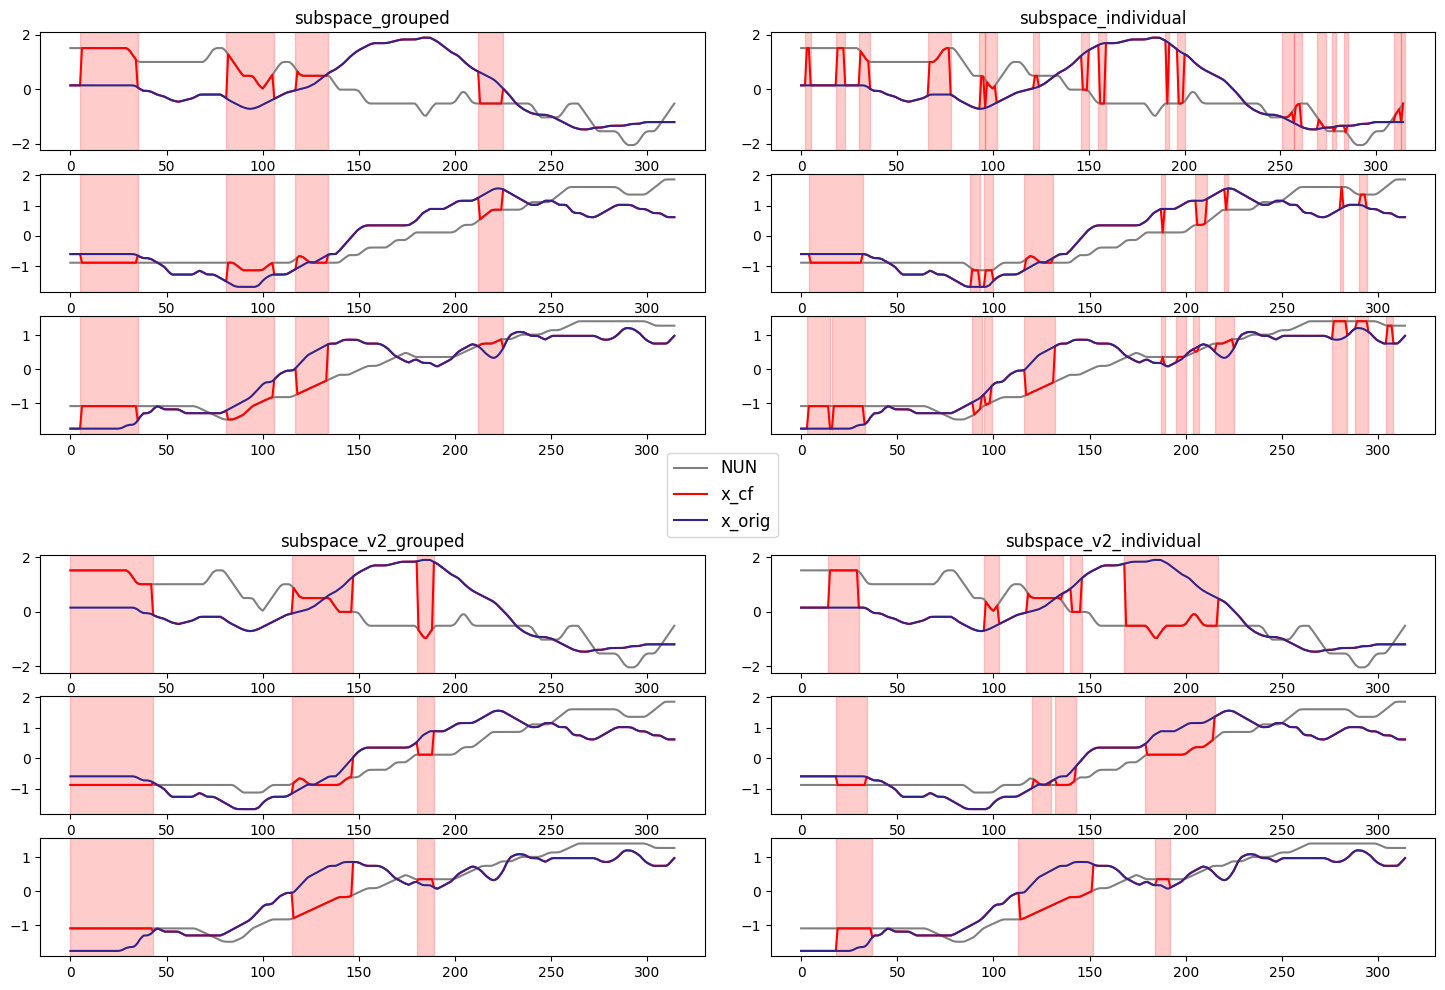

In [12]:
X_train, y_train, X_test, y_test = data_dict[dataset]
nuns_idx = nuns_idx_dict[dataset]
original_classes = original_classes_dict[dataset]
desired_classes = desired_classes_dict[dataset]
sol_cfs_methods = methods_cfs_dict[dataset]
sol_cfs_methods = {method: sol_cfs[instance]['cf'] for method, sol_cfs in sol_cfs_methods.items() if method in methods}

print(f'Sample {instance}: true class {y_test[instance]}, x_orig predicted {original_classes[instance]}, desired_class  {desired_classes[instance]}')
plot_comp_cfs(X_test[instance], X_train[nuns_idx[instance]], sol_cfs_methods)


In [ ]:
# Create plot with examples of each method in each dataset

In [ ]:
# CBF: 1, 2, 10, 18, 19
# chinatown: 3, 7, 19
# coffee: 1, 3, 9, 16
# ECG200: 0, 13
# gunpoint: 9, 10, 15 (pesimos en general)
dataset_samples = [('CBF', 2), ('chinatown', 19), ('coffee', 3), ('ECG200', 13), ('gunpoint', 15)]
methods_trad_dict = {"wcf_ng": "W-CF", "ng": "NG", "ab_cf": "AB-CF", "subspace": "Sub-SpaCE"}
methods = list(methods_trad_dict.keys())
include_nun_list = [False, False, False, False]

In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(16, 6))
grid_rows = len(methods)
grid_columns = len(dataset_samples)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer % grid_columns
    dataset, instance = dataset_samples[i_dataset]
    column_title = f'{dataset} instance {instance}'
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer // grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break

    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        if m == 0:
            ax.set_title(column_title)
        if i_dataset == 0:
            ax.set_ylabel(methods_trad_dict[method_name], size='large')
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    loc='lower center',
    # loc='center right',
    prop={'size': 14},
    ncol=3
)"""
# plt.show()
# plt.savefig('./experiments/results/examples_cfs.png', dpi=300)


In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(12, 12))
grid_rows = len(dataset_samples)
grid_columns = len(methods)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer // grid_columns
    dataset, instance = dataset_samples[i_dataset]
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer % grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break
    
    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        column_title = methods_trad_dict[method_name]
        # row_title = f'{dataset} \n instance {instance}'
        row_title = f'{dataset} [{instance}]'
        if m == 0:
            ax.set_ylabel(row_title, fontsize=16, rotation=90)
        if i_dataset == 0:
            ax.set_title(column_title, fontsize=18)
            
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    # loc='lower center',
    loc='center right',
    prop={'size': 18},
    ncol=1
)"""
# plt.show()
plt.savefig('./experiments/results/examples_cfs.png', dpi=300)
